# 9 텍스트를 분류합니다. - 순환 신경망(recurrent neural network)

## 09-1 순차 데이터와 순환 신경망을 배웁니다

지금까지 인공신경망에 사용한 데이터는 각 샘플이 독립적이라고 가정했기 때문에 에포크마다 전체 샘플을 섞은 후에 모델을 훈련을 진행할 수 있었습니다.

### 순차 데이터를 소개합니다.

날씨 정보는 샘플이 서로 연관되어 있습니다. 오후4시 온도는 오후3시 온도에 영향을 받습니다.
이런 데이터를 시계열(time series)데이터라고 부릅니다.

시계열 데이터를 포함하여 샘플에 순서가 있는 데이터를 일반적으로 순차 데이터(sequential data)라고 부릅니다.
이런 데이터를 처리할 때 각 단계를 타임 스텝(time step)이라고 부릅니다. 예를 들어 Hello Deep 에서 단어 단위로 처리하면 2 time step 이고 글자 단위로 처리하면 9 time step 입니다.

### 순환 신경망을 소개합니다.

순환 신경망은 말 그대로 뉴런의 출력이 순환되는 신경망을 말합니다.

> <b> 순환 신경망은 뉴런을 셀이라고 부릅니다. </b>

!교재 참조

### 순환 신경망의 정방향 계산을 알아봅니다.

$$Z_1 = XW_{1x} + H_pW_{1h} + b_1 $$
$$H=tanh(Z_1)$$

> 수식이 너무 많아서 노트로 대체

## 09-2 순환 신경망을 만들고 텍스트를 분류합니다

### 훈련 세트와 검증 세트를 준비합니다.

* IMDB 데이터 세트는 인터넷 영화 데이터베이스(Internet Movie Database)에서 수집한 영화 리뷰 데이터입니다.
* 순환 신경망으로 이 리뷰들이 긍정적인지 부정적인지 판별
* 훈련세트 25,000개 테스트 세트 25,000 훈련세트에서 5,000개 세트로 검증 세트



In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

"""
skip_top : 가장 많이 등장한 단어 제외 a, the is 같은거 제외
num_words : 메모리 절약을 위해 단어는 100개만 사용
"""

'\nskip_top : 가장 많이 등장한 단어 제외 a, the is 같은거 제외\nnum_words : 메모리 절약을 위해 단어는 100개만 사용\n'

In [2]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [3]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [4]:
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w>2] # w가 2보다 큰 단어만 남김 2는 어휘 사전에 없는 단어, 0과 1은 패딩과 글 시작
 
print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

17

In [6]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w-3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [7]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [8]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [0]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [0]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [11]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [0]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [13]:
print(x_train_onehot.shape)

(20000, 100, 100)


In [14]:
print(x_train_onehot.nbytes)

800000000


In [0]:
# 760MB 단어 100개 썼는데

In [16]:
!pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
class RecurrentNetwork:
  def __init__(self, n_cells=10, units=10, batch_size=32, learning_rate=0.1):
    self.n_cells = n_cells
    self.batch_size = batch_size
    self.w1h = None
    self.w1x = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.h = None
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate

  def forpass(self, x):
    self.h = [np.zeros((x.shape[0], self.n_cells))]
    seq = np.swapaxes(x, 0, 1)
    for x in seq:
      z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
      h = np.tanh(z1)
      self.h.append(h)
      z2 = np.dot(h, self.w2) + self.b2
    return z2
  def backprop(self, x, err):
    m = len(x)

    w2_grad = np.dot(self.h[-1].T, err) / m
    b2_grad = np.sum(err) / m

    seq = np.swapaxes(x, 0, 1)

    w1h_grad = w1x_grad = b1_grad = 0
    err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] **2)

    for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
      w1h_grad += np.dot(h.T, err_to_cell)
      w1x_grad += np.dot(x.T, err_to_cell)
      b1_grad += np.sum(err_to_cell, axis=0)

      err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)

    w1h_grad /= m
    w1x_grad /= m
    b1_grad /= m

    return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def init_weights(self, n_features, n_classes):
    orth_init = tf.initializers.Orthogonal()
    glorot_init = tf.initializers.glorot_uniform()

    self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()
    self.w1x = glorot_init((n_features, self.n_cells)).numpy()
    self.b1 = np.zeros(self.n_cells)
    self.w2 = glorot_init((self.n_cells, n_classes)).numpy()
    self.b2 = np.zeros(n_classes)

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    np.random.seed(42)
    self.init_weights(x.shape[2], y.shape[1])

    for i in range(epochs):
      print('에포크', i, end=' ')
      batch_losses = []
      for x_batch, y_batch in self.gen_batch(x, y):
        print('.', end='')
        a = self.training(x_batch, y_batch)
                
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
        batch_losses.append(loss)
      print()
      self.losses.append(np.mean(batch_losses))
      self.update_val_loss(x_val, y_val)

  def gen_batch(self, x, y):
    bins = len(x) // self.batch_size
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]

  def training(self, x, y):
    m = len(x)
    z = self.forpass(x)
    a = self.sigmoid(z)
    err = -(y - a)
        
    w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        
    self.w1h  -= self.lr * w1h_grad
    self.w1x -= self.lr * w1x_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
        
    return a

  def predict(self, x):
    z = self.forpass(x)
    return z > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y.reshape(-1, 1))

  def update_val_loss(self, x_val , y_val):
    z = self.forpass(x_val)
    a = self.sigmoid(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
    self.val_losses.append(val_loss)




In [18]:
rn = RecurrentNetwork(n_cells=32, batch_size =32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

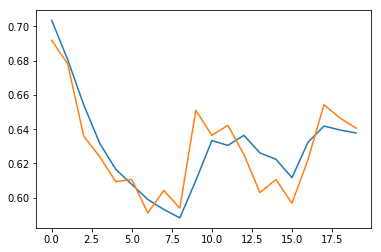

In [19]:
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [20]:
rn.score(x_val_onehot, y_val)

0.63

In [0]:
# 결과가 많이 아쉽습니다. 좀 더 고급 기술을 사용하여 순환 신경망을 업그레이드 해봅시다

## 09-3 텐서플로로 순환 신경망을 만듭니다

### SimpleRNN 클래스로 순환 신경망 만들기

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [24]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 18s 880us/sample - loss: 0.6995 - accuracy: 0.5242 - val_loss: 0.6868 - val_accuracy: 0.5504
Epoch 2/20
20000/20000 [==============================] - 16s 797us/sample - loss: 0.6739 - accuracy: 0.5817 - val_loss: 0.6734 - val_accuracy: 0.5816
Epoch 3/20
20000/20000 [==============================] - 16s 795us/sample - loss: 0.6474 - accuracy: 0.6266 - val_loss: 0.6392 - val_accuracy: 0.6420
Epoch 4/20
20000/20000 [==============================] - 16s 792us/sample - loss: 0.6256 - accuracy: 0.6511 - val_loss: 0.6003 - val_accuracy: 0.6788
Epoch 5/20
20000/20000 [==============================] - 16s 788us/sample - loss: 0.6125 - accuracy: 0.6675 - val_loss: 0.6128 - val_accuracy: 0.6644
Epoch 6/20
20000/20000 [==============================] - 16s 794us/sample - loss: 0.6009 - accuracy: 0.6780 - val_loss: 0.5962 - val_accuracy: 0.6804
Epoch 7/20
20000/20000 [=====================

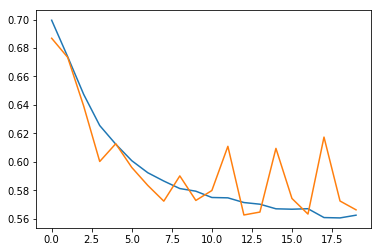

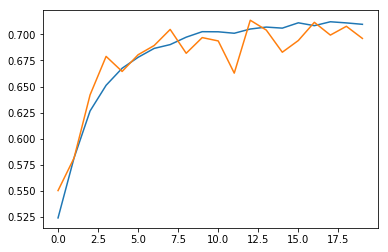

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [0]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)

In [28]:
print(accuracy)

0.696


성능이 약간 향상되었으나 아직 부족

### 임베딩층으로 순환 신경망 모델 성능 높이기

원-핫 임베딩은 입력 데이터 크기와 사용할 수 있는 영단어의 수가 제한된다는 문제가 있으며 단어 사이에 관련성이 전혀 없다는 가정이 전제되어야 합니다.

이러한 문제를 해결하기 위해 고안된 것이 단어 임베딩(word embedding)입니다. 단어 임베딩은 다음 그림처럼 단어를 고정된 길이의 실수 벡터로 임베딩 합니다. 

각 임베딩된 벡터끼리의 거리가 가까울 수록 단어들끼리 연관성이 있다고 합니다

In [0]:
from tensorflow.keras.layers import Embedding

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w>2]
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [0]:
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [31]:
model_ebd = Sequential()
model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 802us/sample - loss: 0.4980 - accuracy: 0.7703 - val_loss: 0.4623 - val_accuracy: 0.7904
Epoch 2/10
20000/20000 [==============================] - 15s 732us/sample - loss: 0.4041 - accuracy: 0.8272 - val_loss: 0.4407 - val_accuracy: 0.8054
Epoch 3/10
20000/20000 [==============================] - 15s 743us/sample - loss: 0.3627 - accuracy: 0.8487 - val_loss: 0.4262 - val_accuracy: 0.8128
Epoch 4/10
20000/20000 [==============================] - 15s 735us/sample - loss: 0.3345 - accuracy: 0.8626 - val_loss: 0.4302 - val_accuracy: 0.8080
Epoch 5/10
20000/20000 [==============================] - 15s 730us/sample - loss: 0.3002 - accuracy: 0.8819 - val_loss: 0.4316 - val_accuracy: 0.8116
Epoch 6/10
20000/20000 [==============================] - 14s 686us/sample - loss: 0.2789 - accuracy: 0.8918 - val_loss: 0.4462 - val_accuracy: 0.8026
Epoch 7/10
20000/20000 [=====================

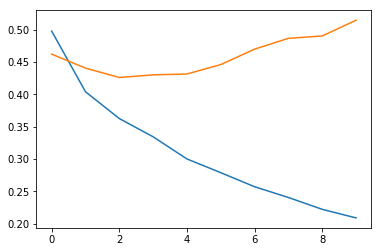

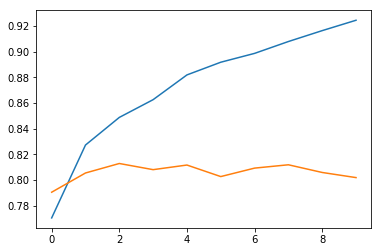

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [36]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8018


## 09-4 LSTM 순환 신경망을 만들고 텍스트를 분류합니다.

전에서 TBPTT 를 통해서 구현했지만 이 방법은 그레이디언트가 타임스텝 끝까지 전파되지 않으므로 타임 스텝이 멀리 떨어진 영단어 사이의 관계를 파악하기 어렵습니다. 이런 경우에는 좀 더 긴 타임 스텝의 데이터를 처리하는 LSTM(Long Short-Term Memory)순환 신경망을 사용합니다. LSTM 순환 신경망은 1997년 호크라이터(Hochreiter)와 슈미트후버(Schmidhuber)가 고안한 것으로 그레이디언트 소실(vanishing gradient)문제를 극복하여 긴 시퀀스를 성공적으로 모델링할 수 있습니다.

!책 참조

In [38]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 1312      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.4474 - accuracy: 0.8021 - val_loss: 0.3777 - val_accuracy: 0.8354
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3348 - accuracy: 0.8597 - val_loss: 0.3725 - val_accuracy: 0.8372
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3144 - accuracy: 0.8691 - val_loss: 0.3580 - val_accuracy: 0.8410
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.2987 - accuracy: 0.8744 - val_loss: 0.3597 - val_accuracy: 0.8416
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.2852 - accuracy: 0.8807 - val_loss: 0.3753 - val_accuracy: 0.8390
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.2758 - accuracy: 0.8828 - val_loss: 0.3731 - val_accuracy: 0.8374
Epoch 7/10
20000/20000 [==============================] -

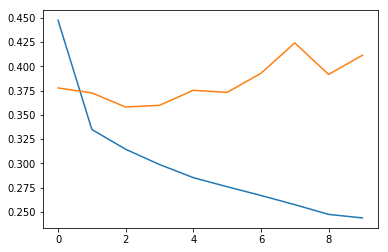

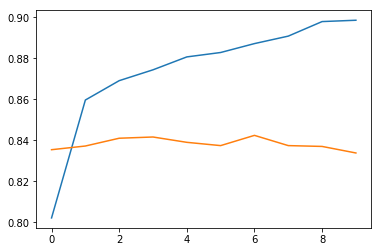

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

overfitting 되었네요.. ㅠ 

### 이 책을 모두 읽었습니다! 마지막 결과값이 좀 아쉬운건 이제부터 머신런닝 입문을 끝마치고 더 나아가야 할 길이 많다는걸 암시하는거 같습니다!
